In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from py_iontrap_eda.utils import Units, IonLibrary
from py_iontrap_eda.trap.rail import Zone, Spacing, TweakerRailParameters, TweakerRail
from py_iontrap_eda.trap.route_method import RouteMethod
from py_iontrap_eda.simulation.gapless_simulator import GaplessROI, GaplessSolver

In [3]:
rail = TweakerRail("main", 
            TweakerRailParameters(
                dc_length=500*Units.um, 
                inner_dc_width=35*Units.um,
                rf_width=105*Units.um,
                tweaker_width=20*Units.um,
                n_layers=1,
                total_width=(125 * 8)*Units.um,
                rf_merge_length=400*Units.um,
                z_padding=300*Units.um,
                rf_padding_left_width = 500*Units.um,
                rf_padding_right_width = 500*Units.um,
                via_pad_width=None,# 200*Units.um,
                via_pad_gap=None, # 20*Units.um,
                zones=[                   
                    Spacing(125 * Units.um, 1),
                    Zone("trapping", np.array([125, 125, 125]) * Units.um),
                    Zone("trapping", np.array([125, 125, 125]) * Units.um),
                    Spacing(125 * Units.um, 1)
                ]
            )
           )

In [4]:
rail.compile()

In [5]:
rail.show(show_ports=False)

2025-11-04 16:05:10.492 | INFO     | kfactory.kcell:show:4059 - klive v0.4.1: Reloaded file 'C:\Users\gk141\OneDrive - Duke University\Documents\Libraires\py-iontrap-eda\build\oas\base_rail_show.oas'


In [27]:
solver = GaplessSolver(
    rail, 
    GaplessROI(-500*Units.um, 500*Units.um, -500*Units.um, 500*Units.um), 
    ion = IonLibrary.Ba137
)

In [171]:
potential_function = solver.potential_factory(36 * Units.MHz, {
    'RF': 150*Units.V,
    # 'E0': 3*Units.V,
    'E0': 2*Units.V,
    # 'E1': 10*Units.V
}
                             )

In [172]:
x = -1.5 * 125*Units.um
y_list = np.linspace(-100, 100, 301) * Units.um
z_list = np.linspace(30, 180, 201) * Units.um
y_grid, z_grid = np.meshgrid(y_list, z_list)
potential_grid = potential_function(x, y_grid, z_grid)

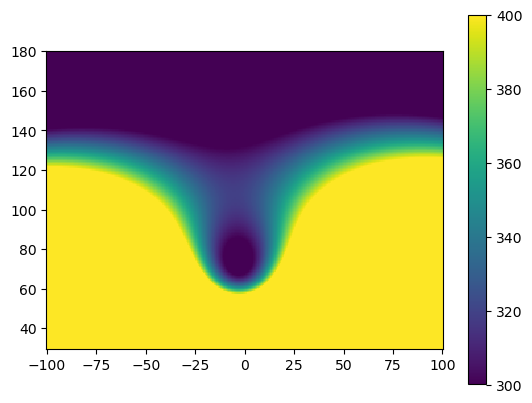

In [183]:
vmin = 300
vmax = 400
fig = plt.figure()
ax = fig.add_subplot(111)
p = ax.pcolormesh(y_list / Units.um, z_list / Units.um, potential_grid / Units.meV, vmin=vmin, vmax=vmax)
plt.colorbar(p, ax=ax)
ax.set_aspect('equal')